In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('stroke.csv')


In [3]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
df.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [5]:
df['gender']=df['gender'].replace(['Male', 'Female', 'Other'],[1,2,3])
df['ever_married']=df['ever_married'].replace(['Yes', 'No'], [1,2])
df['work_type']=df['work_type'].replace(['Private', 'Self-employed', 'children', 'Govt_job', 'Never_worked'],[1,2,3,4,5])
df['Residence_type']=df['Residence_type'].replace(['Urban', 'Rural'], [1,2])
df['smoking_status']=df['smoking_status'].replace(['never smoked','formerly smoked','smokes'],[1,2,3])
df['smoking_status']=df['smoking_status'].replace(['Unknown'],np.NaN)


In [6]:
df=df.dropna()
df=df.drop('id', axis=1)

In [7]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,2.0,1
2,1,80.0,0,1,1,1,2,105.92,32.5,1.0,1
3,2,49.0,0,0,1,1,1,171.23,34.4,3.0,1
4,2,79.0,1,0,1,2,2,174.12,24.0,1.0,1
5,1,81.0,0,0,1,1,1,186.21,29.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...
5100,1,82.0,1,0,1,2,2,71.97,28.3,1.0,0
5102,2,57.0,0,0,1,1,2,77.93,21.7,1.0,0
5106,2,81.0,0,0,1,2,1,125.20,40.0,1.0,0
5107,2,35.0,0,0,1,2,2,82.99,30.6,1.0,0


In [8]:
data=np.asarray(df)
X=data[:,:-1]
Y=data[:,-1]

In [9]:
def clasification(X, Y, kernel, train_size):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = train_size, random_state=42)
    model = SVC(kernel = kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)


In [10]:
results = []
kernels = ['linear', 'poly', 'rbf']
train_set_sizes = [0.2, 0.4, 0.6, 0.8]
for kernel in kernels:
    small_list = []
    for size in train_set_sizes:
        small_list.append(clasification(X, Y, kernel, size))
    results.append(small_list)
    
print(results)

[[0.9460051076249544, 0.9499027237354085, 0.949671772428884, 0.9358600583090378], [0.9460051076249544, 0.9499027237354085, 0.949671772428884, 0.9358600583090378], [0.9460051076249544, 0.9499027237354085, 0.949671772428884, 0.9358600583090378]]


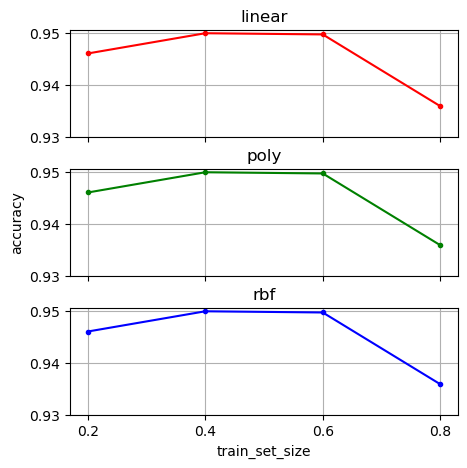

In [11]:

fig, axs = plt.subplots(3, sharex=True, figsize=(5,5))


axs[0].grid(which='both')
axs[0].plot(train_set_sizes, results[0], c='red', marker='.')
axs[0].set_title('linear')
axs[0].set_xticks([0.2, 0.4, 0.6, 0.8])
axs[0].set_yticks([0.93, 0.94, 0.95])


axs[1].grid(which='both')
axs[1].plot(train_set_sizes, results[1], c='green', label='poly', marker='.')
axs[1].set_title('poly')
axs[1].set_xticks([0.2, 0.4, 0.6, 0.8])
axs[1].set_yticks([0.93, 0.94, 0.95])
axs[1].set_ylabel('accuracy')


axs[2].grid(which='both')
axs[2].plot(train_set_sizes, results[2], c='blue', label='rbf', marker='.')
axs[2].set_title('rbf')
axs[2].set_xticks([0.2, 0.4, 0.6, 0.8])
axs[2].set_yticks([0.93, 0.94, 0.95])
axs[2].set_xlabel('train_set_size')


plt.subplots_adjust(wspace=0.5, 
                    hspace=0.3)

plt.savefig('SVC_kernel_sizes_accuracy.png')



In [18]:
def clasification(X, Y, c_value, n_degree):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size= 0.8, random_state=22) 
    model = SVC(kernel = "linear", C = c_value, degree=n_degree)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)



In [21]:
results = []
n_degree = [2,3,4,5]
c_values = [0.001, 0.01, 0.1, 1, 10]

for degree in n_degree:
    small_list = []
    for c_value in c_values:
        small_list.append(clasification(X, Y, c_value, degree))
    results.append(small_list)
    
results[0]


[0.9329446064139941,
 0.9329446064139941,
 0.9329446064139941,
 0.9329446064139941,
 0.9329446064139941]

In [14]:
def clasification(X,Y, r_state):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size= 0.4, random_state=r_state)
    model = SVC(kernel = 'linear')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    return accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred)


In [15]:
results_train = []
results_test = []
for i in range(50):
    results = clasification(X, Y, i)
    results_train.append(results[0])
    results_test.append(results[1])
  

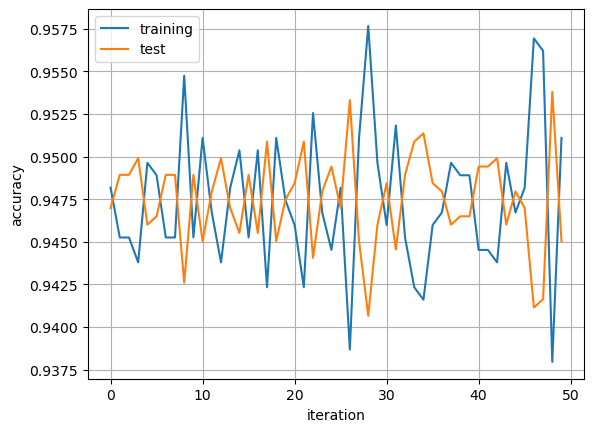

In [16]:
fig, ax = plt.subplots()

ax.plot(results_train, label="training")
ax.plot(results_test, label="test")
ax.set_xlabel("iteration")
ax.set_ylabel("accuracy")
ax.grid()
plt.legend()
plt.savefig('symulacja_svc')